In [282]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [283]:
data = pd.read_csv("file://localhost/G:\云课堂\机器学习-斯坦福-Andrew NG-2012\作业\ex2/ex2data1.txt", \
                  header=None, names=['Exam 1', 'Exam 2', 'Admitted'], encoding='utf-8')
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [284]:
#图形化
# data.dtypes
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

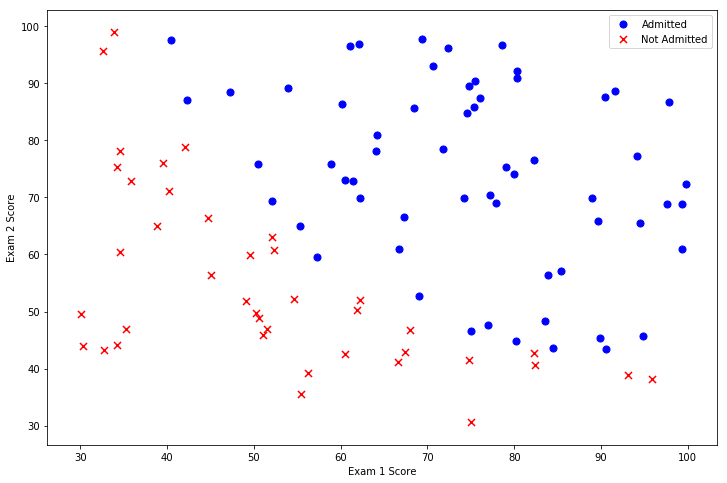

In [285]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [286]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

(0, 1)

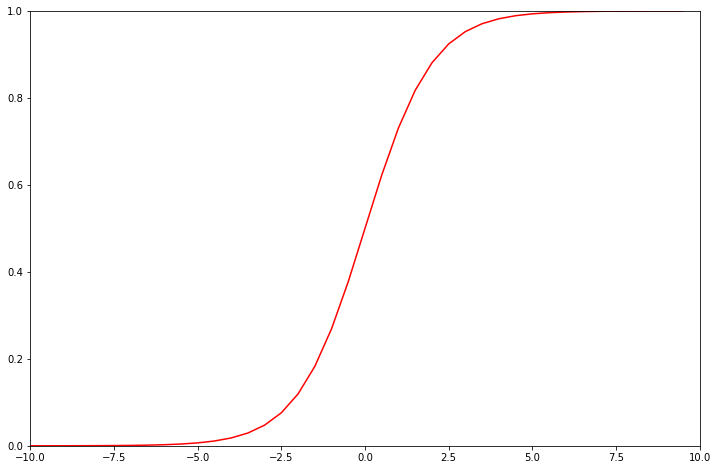

In [287]:
nums = np.arange(-10, 10, 0.5)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')
ax.set_xlim(left=-10,right=10)
ax.set_ylim(bottom=0,top=1)

In [288]:
def compute_cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
#     print(X.shape, y.shape)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
#     print(first.shape,second.shape)
    return np.sum(first - second) / X.shape[0]

In [289]:
#数据整理
m, n = data.shape
trainData = np.ones((m, n))
trainData[:,1:] = data.values[:,:-1]
trainLabel = data.values[:,-1].reshape(m, 1)

In [290]:
theta = np.zeros(n)
compute_cost(theta, trainData, trainLabel)

0.69314718055994529

In [291]:
#梯度下降,仅仅计算梯度，不优化权重
def gradient_descent(theta, X, y):
    theta = np.matrix(theta)
#     print(compute_cost(theta, trainData, trainLabel))
    X = np.matrix(X)
    y = np.matrix(y)
    
    loss_m = sigmoid(X * theta.T) - y
#     print(loss_m.shape)
    gradient = (X.T * loss_m) / X.shape[0]
#     print(gradient)
    return gradient.T

In [292]:
#使用scipy的optimize优化权重
import scipy.optimize as opt
result = opt.fmin_tnc(func=compute_cost, x0=theta, fprime=gradient_descent, \
                     args=(trainData, trainLabel))

In [293]:
compute_cost(result[0], trainData, trainLabel)

0.20349770158947475

In [294]:
def predict(theta, X):
    theta = np.matrix(theta)
    probability_m = sigmoid(np.dot(X, theta.T))
    
    return [1 if x >= 0.5 else 0 for x in probability_m]

In [295]:
predictions = predict(result[0], trainData)
correct = [1 if ((a == 1 and b == 1 ) or (a == 0 and b == 0)) else 0 for (a,b) in \
          zip(predictions, trainLabel)]

In [296]:
type(correct)
float(sum(correct)) / 100

0.89

In [328]:
accuracy = (float(sum(correct)) / m)
print('accuracy = %d%%' % (accuracy * 100))

accuracy = 89%


## 正则化的逻辑回归

In [329]:
#regularized logistic regression
data2 = pd.read_csv('file://localhost/G:\云课堂\机器学习-斯坦福-Andrew NG-2012\作业\ex2/ex2data2.txt', \
                   header=None, names=['Test1', 'Test2', 'Accepted'], encoding='utf-8')
data2.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [330]:
positive = data2[data2.Accepted.isin([1])]
negative = data2[data2.Accepted.isin([0])]

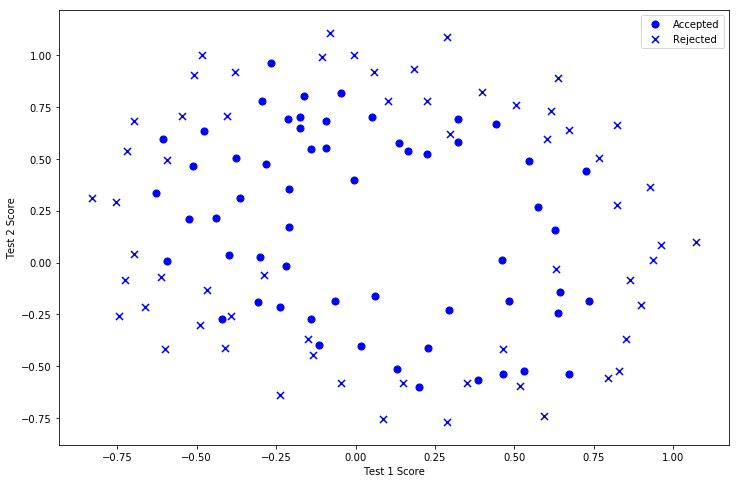

In [331]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive.Test1, positive.Test2, s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative.Test1, negative.Test2, s=50, c='b', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

In [332]:
#两类分隔，类似一个圆形，猜测以多次方，方程描述
degree = 5
for i in range(1, degree):
    for j in range(0, i):
        data2['F' + str(i) + str(j)] = np.power(data2.Test1, i-j) * np.power(data2.Test2, j)

In [333]:
data2.drop('Test1', axis=1, inplace=True)
data2.drop('Test2', axis=1, inplace=True)
data2.head()

,Accepted,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [334]:
def compute_cost_reg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / (2 * X.shape[0])) * np.sum(np.power(theta[:,1:], 2))
    return np.sum(first - second) / X.shape[0] + reg

In [335]:
def costReg(theta, X, y, learningRate):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / (2 * len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + reg

In [336]:
def gradient_descent_reg(theta, X, y, learningRate):
#     print(compute_cost_reg(theta, trainData2, trainLabel2, learningRate))
#     print(X[1,:])
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    loss_m = sigmoid(X * theta.T) - y
    gradient = X.T * loss_m / X.shape[0]
#     print(gradient.shape)
    gradient[1:,:] = gradient[1:,:] + ((learningRate / X.shape[0]) * theta[:,1:]).T
#     print(gradient.T)
    return gradient.T;

In [337]:
def gradientReg(theta, X, y, learningRate):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])

        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])

    return grad

In [338]:
m, n = data2.shape
print(m,n)
trainData2 = np.ones((m, n))
trainData2[:,1:] = data2.values[:,1:]
trainLabel2 = data2.values[:,0].reshape(m, 1)
# print(trainLabel2)
theta2 = np.zeros(n)

learningRate = 1
compute_cost_reg(theta2, trainData2, trainLabel2, learningRate)

118 11


0.6931471805599454

In [339]:
result2 = opt.fmin_tnc(func=compute_cost_reg, x0=theta2, fprime=gradient_descent_reg, \
                      args=(trainData2, trainLabel2, learningRate))

[  1.00000000e+00  -9.27420000e-02   8.60107856e-03  -6.35227055e-02
  -7.97681228e-04   5.89122275e-03  -4.35092419e-02   7.39785525e-05
  -5.46363780e-04   4.03513411e-03  -2.98012201e-02]
[  1.00000000e+00  -9.27420000e-02   8.60107856e-03  -6.35227055e-02
  -7.97681228e-04   5.89122275e-03  -4.35092419e-02   7.39785525e-05
  -5.46363780e-04   4.03513411e-03  -2.98012201e-02]
[  1.00000000e+00  -9.27420000e-02   8.60107856e-03  -6.35227055e-02
  -7.97681228e-04   5.89122275e-03  -4.35092419e-02   7.39785525e-05
  -5.46363780e-04   4.03513411e-03  -2.98012201e-02]
[  1.00000000e+00  -9.27420000e-02   8.60107856e-03  -6.35227055e-02
  -7.97681228e-04   5.89122275e-03  -4.35092419e-02   7.39785525e-05
  -5.46363780e-04   4.03513411e-03  -2.98012201e-02]
[  1.00000000e+00  -9.27420000e-02   8.60107856e-03  -6.35227055e-02
  -7.97681228e-04   5.89122275e-03  -4.35092419e-02   7.39785525e-05
  -5.46363780e-04   4.03513411e-03  -2.98012201e-02]
[  1.00000000e+00  -9.27420000e-02   8.601078

In [340]:
result2

(array([ 0.5301025 ,  0.29075567, -1.60725763, -0.5821382 ,  0.01781027,
        -0.21329509, -0.40024141, -1.37144138,  0.02264303, -0.9503358 ,
         0.03440849]), 22, 1)

In [341]:
compute_cost_reg(result2[0], trainData2, trainLabel2, learningRate)

0.62268243882873253

In [342]:
predictions2 = predict(result2[0], trainData2)
# print(predictions2)
# print(trainLabel2)
correct2 = [1 if ((a == 1 and b == 1) or (a ==0 and b ==0)) else 0 for (a, b) in zip(predictions2, trainLabel2)]
accuracy2 = float(sum(correct2)) / m
print('accuracy = %d%%' % (accuracy2 * 100))

accuracy = 66%
